In [1]:
from src.utils.PathManager import Paths as Path 
from src.utils.Visualisation import plot_ROC_simple
from src.utils.BayesianLabel import BayesianLabeler as Labeller 
from src.utils.FeatureExtractor import *
import pandas as pd 
import numpy as np 
from datetime import timedelta
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [2]:
well_code = "POND1"

In [3]:
model = FeatureExtractor(well_code)

In [4]:
model.data["label_df"]

,labels
2018-06-25,5
2018-06-27,5
2018-06-28,5
2018-06-29,5
2018-06-30,5
...,...
2018-09-01,5
2018-09-02,5
2018-09-03,5
2018-09-04,5


In [5]:
agg_df = model.get_operation_corrected_feature()
agg_df.name = "ROC_VOLTAGE"
agg_df = agg_df.to_frame()

In [6]:
minV = model.get_minimum_feature(agg_df,"ROC_VOLTAGE").to_frame()

In [7]:
relative_min_V = model.get_relative_performance(minV,"ROC_VOLTAGE",window=90)

In [8]:
relative_min_V[~relative_min_V.isnull()]

2016-09-27    0.930748
2016-09-28    0.916802
2016-09-29    0.926089
2016-09-30    0.991038
2016-10-01    0.992415
                ...   
2020-08-17    0.993698
2020-08-18    0.995598
2020-08-19    0.988847
2020-08-20    0.988847
2020-08-21    1.000000
Name: ROC_VOLTAGE, Length: 1079, dtype: float64

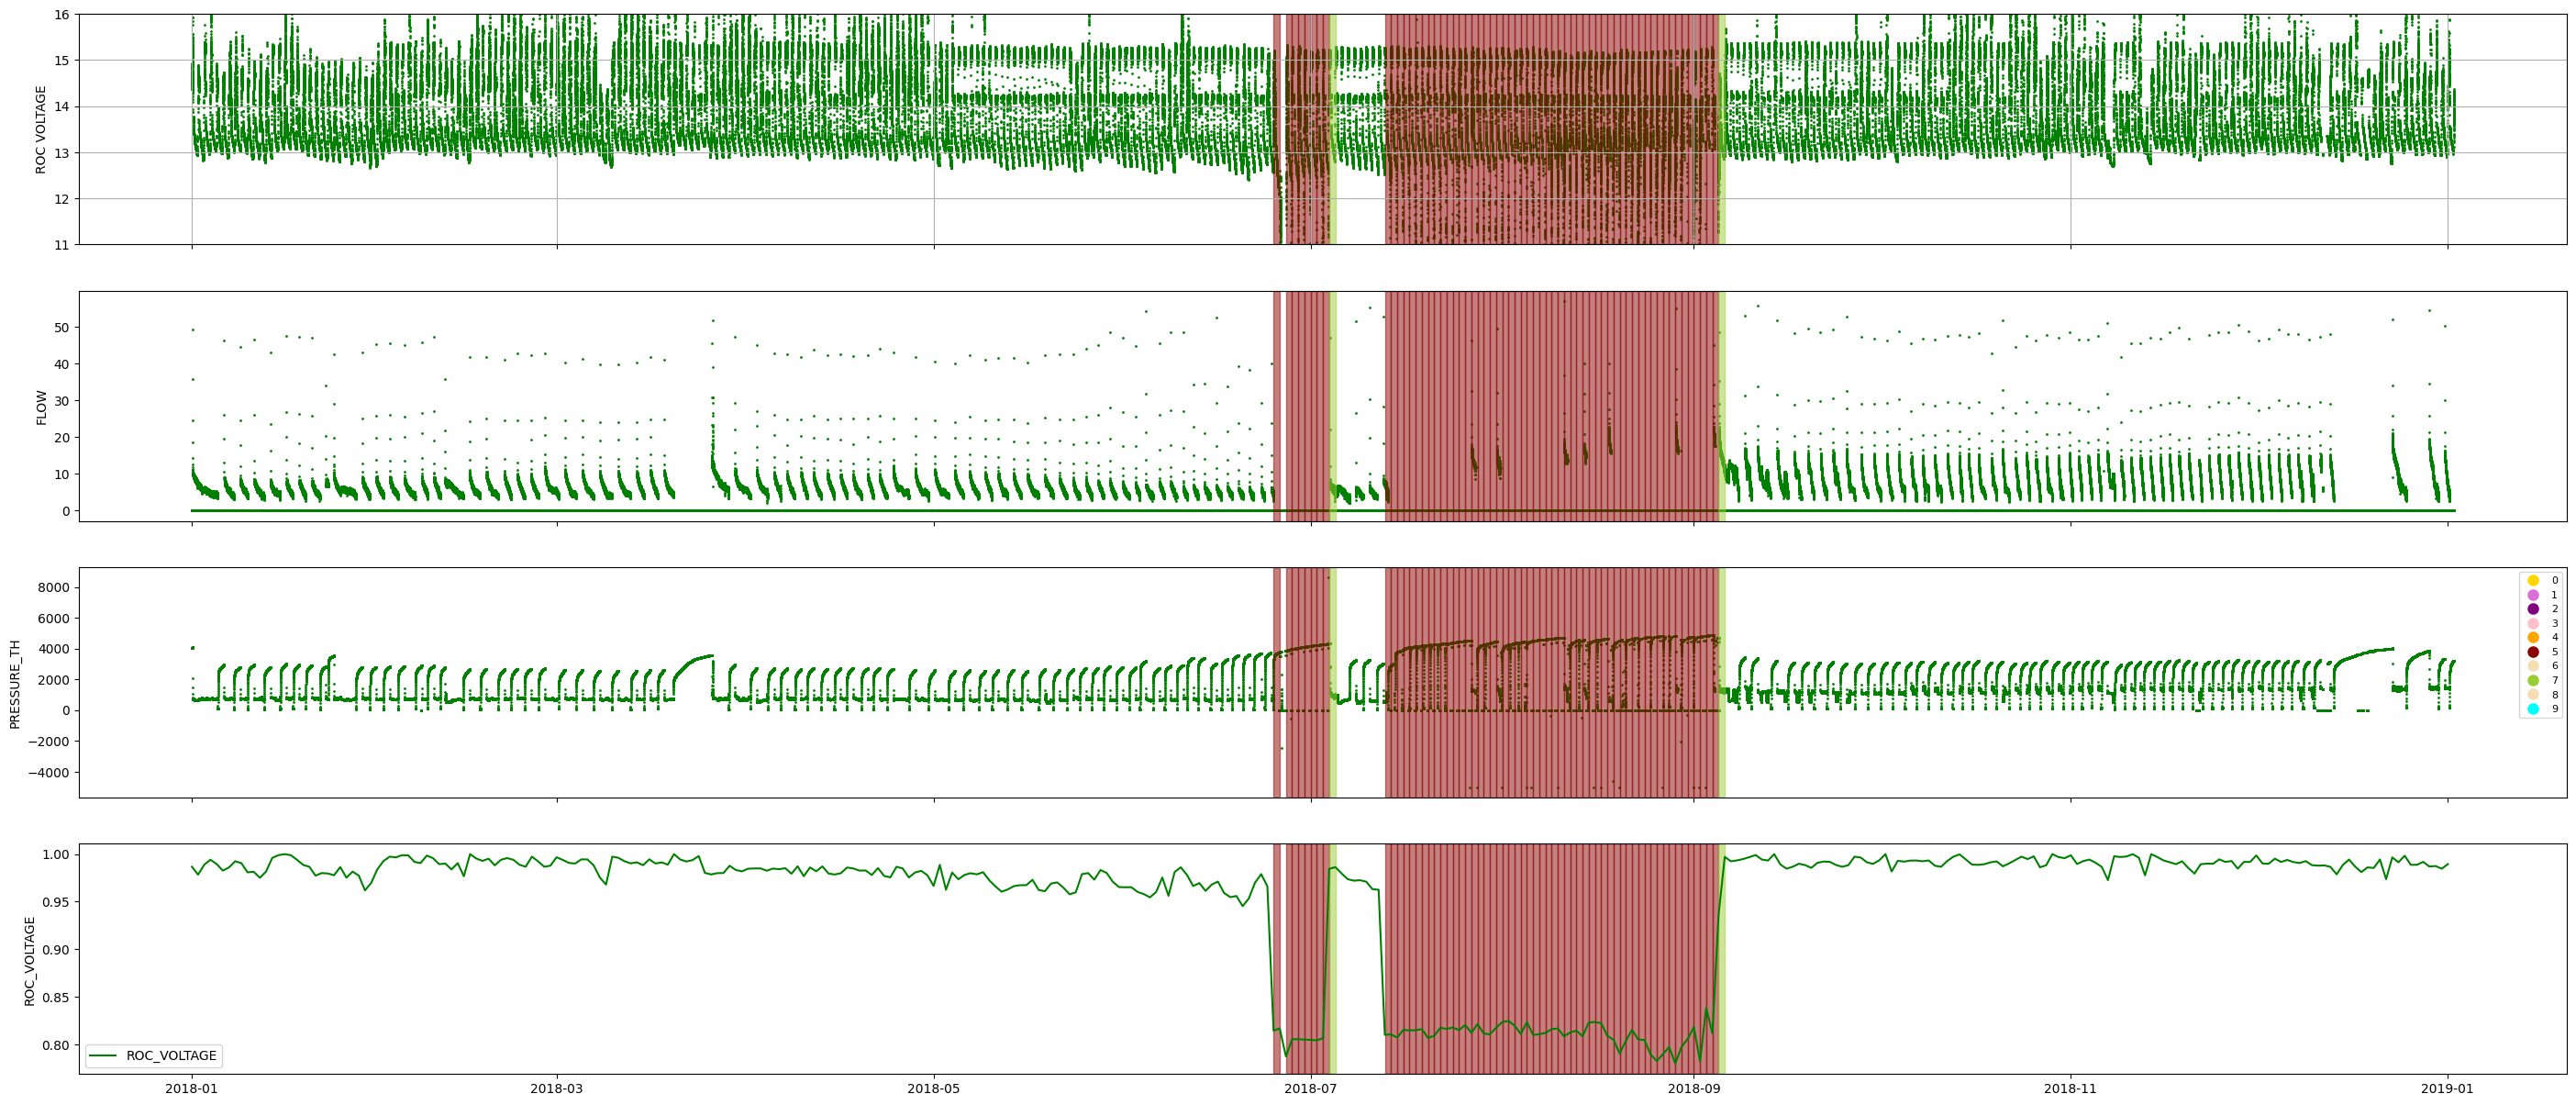

In [9]:
plot_ROC_simple(model.data["raw_df"],model.data["label_df"],start='2018-01-01',end='2019-01-01',ylim={'ROC_VOLTAGE':[11,16]},generated_feature_df=relative_min_V.to_frame())
plt.show()

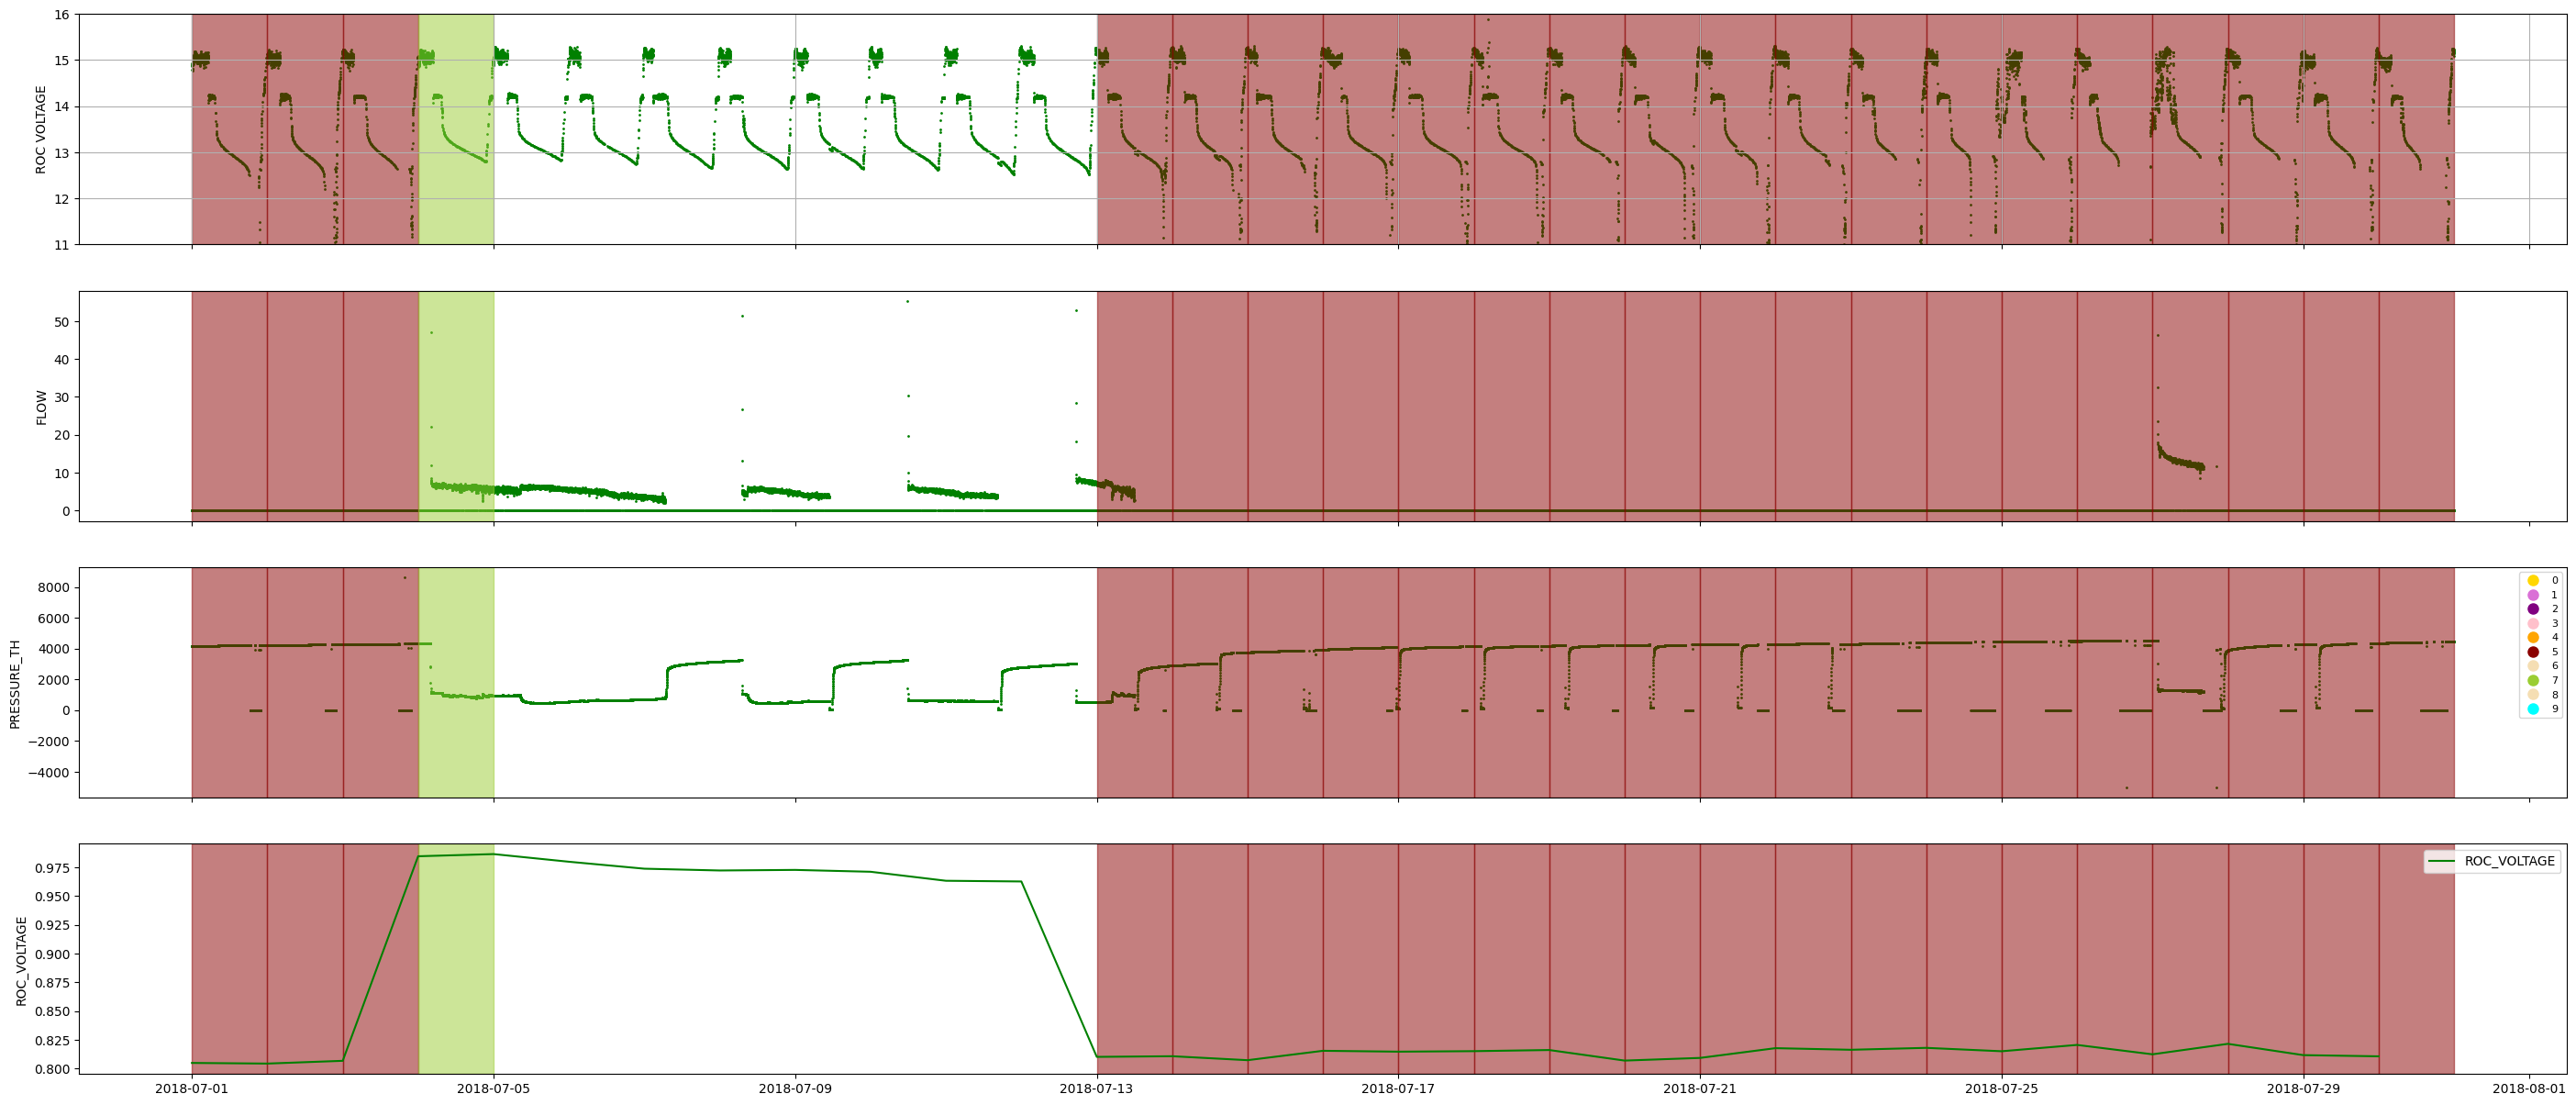

In [10]:
plot_ROC_simple(model.data["raw_df"],model.data["label_df"],start='2018-07-01',end='2018-07-30',ylim={'ROC_VOLTAGE':[11,16]},generated_feature_df=relative_min_V.to_frame())
plt.show()

In [11]:
gradient = model.get_gradient_feature(model.interpolated_data,"ROC_VOLTAGE")

In [12]:
mask_VOLTAGE = model.data['agg_df']['Mask_ROC_VOLTAGE']

In [13]:
m = np.array(mask_VOLTAGE.loc['2018-07-21'])

In [14]:
mask = np.where(m==0)[0]

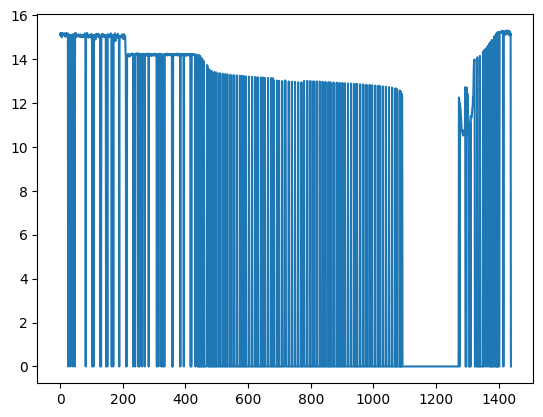

In [15]:
plt.plot(model.data['agg_df'].ROC_VOLTAGE.loc['2018-07-21'])

In [16]:
mask_df = model.data['agg_df']["Mask_ROC_VOLTAGE"]

In [26]:
index_df, label_df = model.get_data_outage_failure_label(1000,1400,120)

In [27]:
gt_df = model.data['label_df']
gt_df = gt_df[gt_df.labels==5]

In [28]:
index_df.loc[gt_df.index]

,VOLTAGE_interval,FLOW_interval,PRESSURE_interval
2018-06-25,"(153, 333)","(204, 366)","(204, 366)"
2018-06-27,"(33, 213)",None,None
2018-06-28,"(93, 273)","(135, 256)","(135, 256)"
2018-06-29,"(33, 273)",None,None
2018-06-30,"(33, 273)",None,None
...,...,...,...
2018-08-31,"(0, 273)","(0, 254)","(0, 254)"
2018-09-01,"(0, 273)","(0, 252)","(0, 252)"
2018-09-02,"(0, 273)","(0, 252)","(0, 252)"
2018-09-03,"(0, 273)","(0, 250)","(0, 250)"


In [29]:
label_df[label_df==1]

2017-12-27    1
2017-12-29    1
2018-06-25    1
2018-06-26    1
2018-06-28    1
             ..
2021-12-09    1
2021-12-10    1
2021-12-11    1
2021-12-12    1
2021-12-13    1
Length: 99, dtype: int64

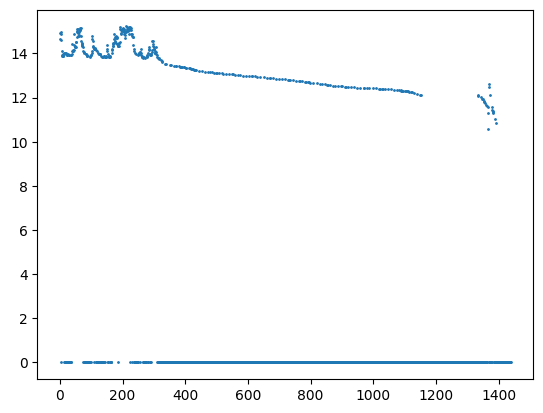

In [33]:
plt.scatter(np.arange(1440),model.data['agg_df'].ROC_VOLTAGE.loc['2018-06-25'],s=1)